ANN (MLPRegressor) Performance:
MAE: 5.827234931962352
MSE: 2966.7241566258717
R² Score: -1.7325830022360829


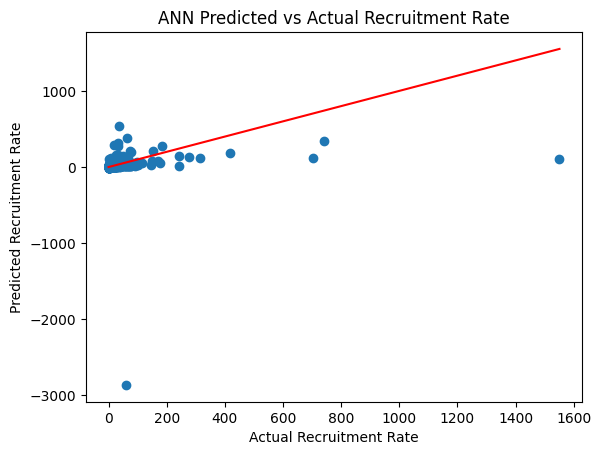

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  # Add this import
from sklearn.preprocessing import LabelEncoder  # Make sure to import LabelEncoder

# Load the cleaned clinical trials dataset
df = pd.read_csv('PS4_cleaned_clinical_trials.csv')

# Drop unnecessary columns
columns_to_drop = [
    "NCT Number", "Study Status_COMPLETED", "Study Status_ENROLLING_BY_INVITATION",
    "Study Status_NOT_YET_RECRUITING", "Study Status_RECRUITING", "Study Status_SUSPENDED",
    "Study Status_TERMINATED", "Study Status_UNKNOWN", "Results First Posted",
    "First Posted", "Last Update Posted", "Start Date", "Primary Completion Date", "Completion Date"
]
df = df.drop(columns=columns_to_drop, axis=1)

# Handle missing values in the target column (Study Recruitment Rate)
imputer = SimpleImputer(strategy="mean")
df["Study Recruitment Rate"] = imputer.fit_transform(df[["Study Recruitment Rate"]])

# Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("Study Recruitment Rate", axis=1)
y = df["Study Recruitment Rate"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLPRegressor (ANN)
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation results
print(f"ANN (MLPRegressor) Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

# Plotting Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Predicted Recruitment Rate')
plt.title('ANN Predicted vs Actual Recruitment Rate')
plt.show()


ANN (MLPRegressor) Performance:
MAE: 5.503003987547341
MSE: 1026.6526714674467
R² Score: 0.054373278018919


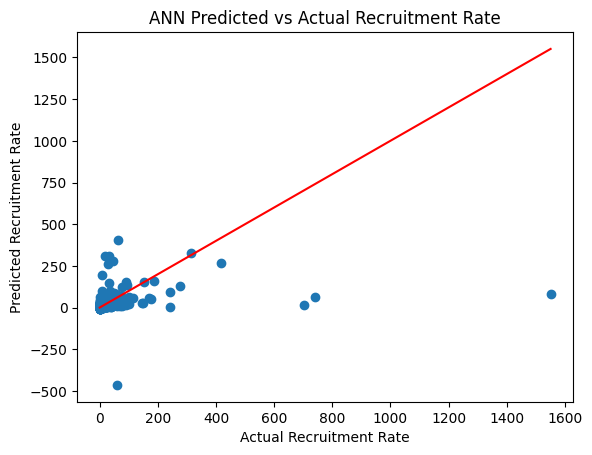

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the cleaned clinical trials dataset
df = pd.read_csv('PS4_cleaned_clinical_trials.csv')

# Drop unnecessary columns
columns_to_drop = [
    "NCT Number", "Study Status_COMPLETED", "Study Status_ENROLLING_BY_INVITATION",
    "Study Status_NOT_YET_RECRUITING", "Study Status_RECRUITING", "Study Status_SUSPENDED",
    "Study Status_TERMINATED", "Study Status_UNKNOWN", "Results First Posted",
    "First Posted", "Last Update Posted", "Start Date", "Primary Completion Date", "Completion Date"
]
df = df.drop(columns=columns_to_drop, axis=1)

# Handle missing values in the target column (Study Recruitment Rate)
imputer = SimpleImputer(strategy="mean")
df["Study Recruitment Rate"] = imputer.fit_transform(df[["Study Recruitment Rate"]])

# Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("Study Recruitment Rate", axis=1)
y = df["Study Recruitment Rate"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLPRegressor (ANN)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # Increased number of neurons and layers for more complexity
    activation='relu',             # 'relu' is generally a good choice for hidden layers
    solver='adam',                 # 'adam' is a popular optimization algorithm for ANN
    max_iter=1500,                 # Increase max_iter to allow more iterations for convergence
    random_state=42
)

# Fit the model
mlp_model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation results
print(f"ANN (MLPRegressor) Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

# Plotting Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Predicted Recruitment Rate')
plt.title('ANN Predicted vs Actual Recruitment Rate')
plt.show()


ANN (MLPRegressor) Performance:
MAE: 6.8895
MSE: 13990.3409
RMSE: 118.2808
R² Score: -11.8862


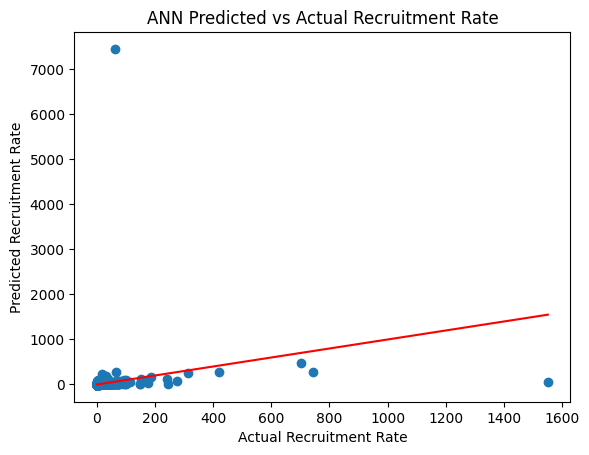

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the cleaned clinical trials dataset
df = pd.read_csv('PS4_cleaned_clinical_trials.csv')

# Drop unnecessary columns
columns_to_drop = [
    "NCT Number", "Study Status_COMPLETED", "Study Status_ENROLLING_BY_INVITATION",
    "Study Status_NOT_YET_RECRUITING", "Study Status_RECRUITING", "Study Status_SUSPENDED",
    "Study Status_TERMINATED", "Study Status_UNKNOWN", "Results First Posted",
    "First Posted", "Last Update Posted", "Start Date", "Primary Completion Date", "Completion Date"
]
df = df.drop(columns=columns_to_drop, axis=1)

# Handle missing values in the target column (Study Recruitment Rate)
imputer = SimpleImputer(strategy="mean")
df["Study Recruitment Rate"] = imputer.fit_transform(df[["Study Recruitment Rate"]])

# Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("Study Recruitment Rate", axis=1)
y = df["Study Recruitment Rate"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLPRegressor (ANN) with fine-tuned hyperparameters
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # Increased number of neurons and layers for more complexity
    activation='relu',             # 'relu' is generally a good choice for hidden layers
    solver='adam',                 # 'adam' is a popular optimization algorithm for ANN
    max_iter=3000,                 # Increased max_iter to allow more iterations for convergence
    random_state=42,
    tol=1e-4,                      # Early stopping tolerance
    warm_start=True,               # Reuse the previous model's state for faster convergence
    early_stopping=True,           # Stop early if validation score is not improving
    validation_fraction=0.1,       # Fraction of training data used for validation set
    n_iter_no_change=10            # Number of iterations without improvement before stopping
)

# Fit the model
mlp_model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation results
print(f"ANN (MLPRegressor) Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"R² Score: {r2:.4f}")

# Plotting Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Predicted Recruitment Rate')
plt.title('ANN Predicted vs Actual Recruitment Rate')
plt.show()
